# demo03_car 小汽车评级

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.utils as su
import sklearn.preprocessing as sp
import sklearn.model_selection as ms
import sklearn.tree as st
import sklearn.ensemble as se
import sklearn.metrics as sm

In [14]:
cars = pd.read_csv('../data/car.txt', header=None)
cars.describe()

,0,1,2,3,4,5,6
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,low,low,2,2,big,low,unacc
freq,432,432,432,576,576,576,1210


In [39]:
# 数据预处理   针对原数据集的每一列进行标签编码
# index:字段名   col_val: 字段Series数组
data = pd.DataFrame([])
encoders = {}
for index, col_val in cars.iteritems():
    lbe = sp.LabelEncoder()
    encodered_col = lbe.fit_transform(col_val)
    data[index] = encodered_col
    encoders[index] = lbe   # 把labelEncoder对象保存起来 测试时继续使用
    
# 整理输入集与输出集
x, y = data.iloc[:, :6], data[6]
x.shape, y.shape

((1728, 6), (1728,))

In [24]:
# 训练决策树分类模型，交叉验证
model = st.DecisionTreeClassifier(max_depth=6, min_samples_split=3)
# 交叉验证
score = ms.cross_val_score(model, x, y, cv=5, scoring='accuracy')
print(score.mean())

0.7634056996908186


In [61]:
# 训练随机森林分类模型
import warnings 
warnings.filterwarnings("ignore") 

model = se.RandomForestClassifier(
    max_depth=9, n_estimators=140, random_state=7)
# 交叉验证
score = ms.cross_val_score(model, x, y, cv=5, scoring='accuracy')
print(score.mean())

0.8126058610028231


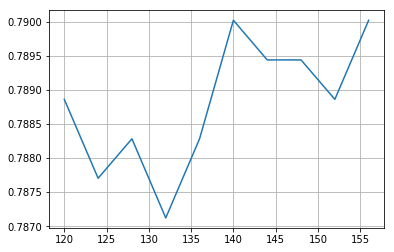

In [55]:
# 验证曲线  （做了验证曲线就没有必要做交叉验证了）
params = np.arange(120, 160, 4)
train_scores, test_scores = ms.validation_curve(
    model, x, y, 'n_estimators', params, cv=5)
mean_scores = test_scores.mean(axis=1)
mean_scores = pd.Series(mean_scores, index=params)
mean_scores.plot(grid='on')

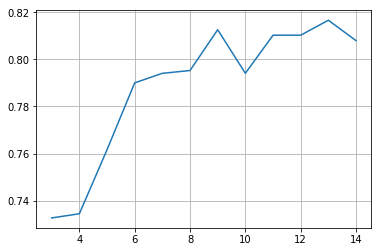

In [60]:
# 验证曲线  （做了验证曲线就没有必要做交叉验证了）
params = np.arange(3, 15)
train_scores, test_scores = ms.validation_curve(
    model, x, y, 'max_depth', params, cv=5)
mean_scores = test_scores.mean(axis=1)
mean_scores = pd.Series(mean_scores, index=params)
mean_scores.plot(grid='on')

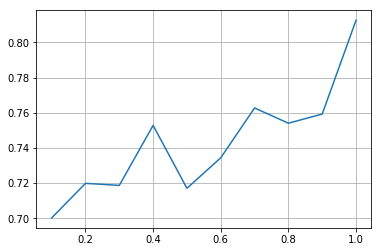

In [64]:
# 学习曲线确定训练集大小
params = np.arange(0.1, 1.1, 0.1)
_, train_scores, test_scores = \
    ms.learning_curve(model, x, y, train_sizes=params, cv=5)
mean_scores = test_scores.mean(axis=1)
mean_scores = pd.Series(mean_scores, index=params)
mean_scores.plot(grid='on')

In [62]:
# 正儿八经训练随机森林
model.fit(x, y)
pred_y = model.predict(x)
print(sm.classification_report(y, pred_y))

             precision    recall  f1-score   support

          0       0.96      1.00      0.98       384
          1       1.00      0.75      0.86        69
          2       1.00      1.00      1.00      1210
          3       0.94      1.00      0.97        65

avg / total       0.99      0.99      0.99      1728



In [63]:
test_data = [
    ['high', 'med', '5more', '4', 'big', 'low', 'unacc'],
    ['high', 'high', '4', '4', 'med', 'med', 'acc'],
    ['low', 'low', '2', '4', 'small', 'high', 'good'],
    ['low', 'med', '3', '4', 'med', 'high', 'vgood']]
test_data = pd.DataFrame(test_data)

# 对test_data的每一列使用相同的编码标准完成标签编码
for index, colval in test_data.iteritems():
    lbe = encoders[index]
    encodered_col = lbe.transform(colval)
    test_data[index] = encodered_col
test_x, test_y = test_data.iloc[:,:6], test_data[6]

# 模型测试
pred_test_y = model.predict(test_x)
# 最后一列的编码器 进行反编码
print(encoders[6].inverse_transform(test_y))
print(encoders[6].inverse_transform(pred_test_y))


['unacc' 'acc' 'good' 'vgood']
['unacc' 'acc' 'good' 'vgood']
